<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the boston housing data (provided)

In [47]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook.
%matplotlib inline

In [48]:
# Imprort Urlib
import urllib
from urllib import request

In [49]:
# Download data from url and save the data as a file in my local dirceory 
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.request.urlretrieve(data_url, './housing.data')

('./housing.data', <http.client.HTTPMessage at 0x1a1f963dd0>)

In [50]:
# Use open() to do a search and replace a comma for double spaces and save as a new file (csv)
f1 = open('./housing.data', 'r')
f2 = open('./housing-edit1.csv', 'w')
for line in f1:
    f2.write(line.replace('  ', ',')) 
f1.close()
f2.close()

In [51]:
# repeat as above but eliminate single spaces
f3 = open('./housing-edit1.csv', 'r')
f4 = open('./housing-edit2.csv', 'w')
for line in f3:
    f4.write(line.replace(' ', '')) 
f3.close()
f4.close()

In [52]:
# read the data file to do a spot check for spaces
housing_edit = open('./housing-edit2.csv','r')
housing_edit.read()

'0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30396.90,4.98,24.00\n0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80396.90,9.14,21.60\n0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80392.83,4.03,34.70\n0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70394.63,2.94,33.40\n0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70396.90,5.33,36.20\n0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70394.12,5.21,28.70\n0.08829,12.50,7.870,0,0.5240,6.0120,66.60,5.5605,5,311.0,15.20395.60,12.43,22.90\n0.14455,12.50,7.870,0,0.5240,6.1720,96.10,5.9505,5,311.0,15.20396.90,19.15,27.10\n0.21124,12.50,7.870,0,0.5240,5.6310100.00,6.0821,5,311.0,15.20386.63,29.93,16.50\n0.17004,12.50,7.870,0,0.5240,6.0040,85.90,6.5921,5,311.0,15.20386.71,17.10,18.90\n0.22489,12.50,7.870,0,0.5240,6.3770,94.30,6.3467,5,311.0,15.20392.52,20.45,15.00\n0.11747,12.50,7.870,0,0.5240,6.0090,82.90,6.2267,5,311.0,15.20396.90,13.27,18.90\n0.09378,12.50,7.870,0,0.52

In [53]:
# Try importing the edited file into a csv 
# unable to clean file 
housing_edit = pd.read_csv('./housing-edit2.csv')
housing_edit.head(1)

ParserError: Error tokenizing data. C error: Expected 13 fields in line 103, saw 14


In [54]:
# Check data for the error message above that there is an unexpected field in line 103
df = pd.read_csv('./boston_housing_data.csv')
df.loc[102:104]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
102,0.22876,0.0,8.56,0,0.52,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
103,0.21161,0.0,8.56,0,0.52,6.137,87.4,2.7147,5,384.0,20.9,394.47,13.44,19.3
104,0.13960,0.0,8.56,0,0.52,6.167,90.0,2.4210,5,384.0,20.9,392.69,12.33,20.1


The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [55]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

### 2. Load the `housing.data` file with python

Using any method of your choice.

> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [56]:
df = pd.read_csv('./boston_housing_data.csv')

### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [60]:
# checked shape, measures of disperion and null values 
# I didn't see any signficiant issues 

In [57]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


In [58]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [59]:
print((df.isnull().sum()))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

In [64]:
# CHAS as the values are binary (0,1) for whether or not the town tracts the Charles river
# RAD is an index of accessibility to the highway and it is unclear how to interpret the index without further research 

In [66]:
# Check distribution of RAD index values
df.RAD.value_counts()

4    242
5    115
3     38
6     26
8     24
2     24
1     20
7     17
Name: RAD, dtype: int64

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

In [27]:
# TAX and CRIME have the highest positive correlation overall but for the purposes of this analysis: 
# In respect to Median Home Value, Lower Status of the Population is most negatively correlated variable at -0.737 
# and Average number of rooms per dwelling is the most positively correlated at 0.695

In [45]:
# check correlation 
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
RAD,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [24]:
# Do a sort on corr to find the lowest and highest values
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

print (so[-506:-14])

DIS    RAD      0.003030
RAD    DIS      0.003030
       NOX      0.009217
NOX    RAD      0.009217
CRIM   CHAS     0.013922
                  ...   
DIS    NOX      0.748872
INDUS  NOX      0.763651
NOX    INDUS    0.763651
TAX    CRIM     0.793392
CRIM   TAX      0.793392
Length: 182, dtype: float64


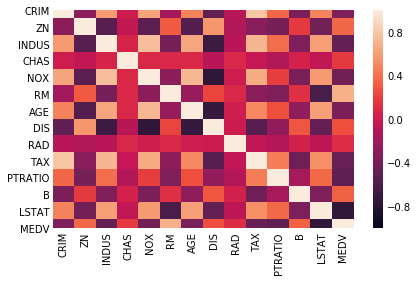

In [67]:
# Create a heat map
sns.set_palette("coolwarm", 7)
sns.heatmap(df.corr(), vmin=-1, vmax=1) 

### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

In [40]:
# B (B is the proportion of blacks by town) is the most skewed right
# ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) is the most skewed right 

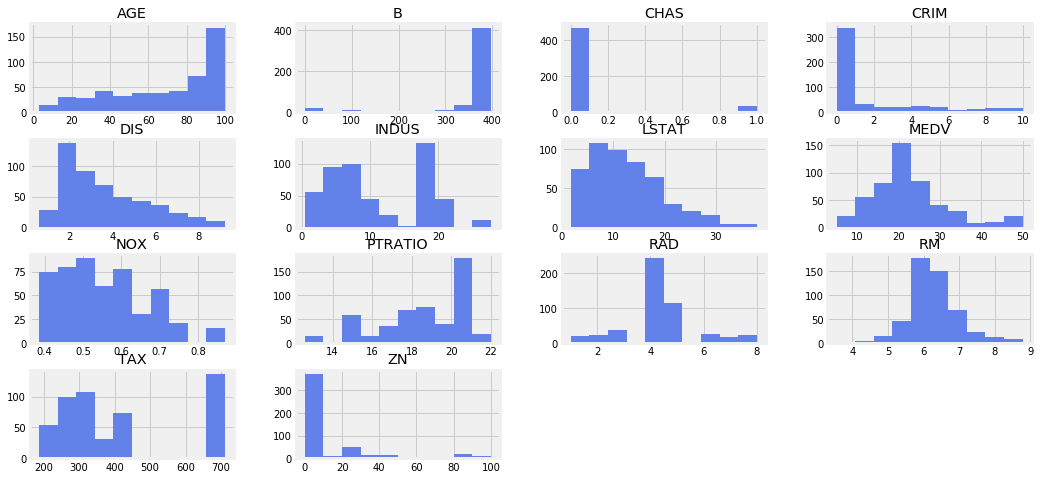

In [33]:
df.hist(figsize=(16,8));

In [39]:
# Do a sore on the skew score
df.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RAD        0.362709
RM         0.403612
TAX        0.669956
NOX        0.729308
DIS        0.834237
LSTAT      0.906460
MEDV       1.108098
CRIM       1.652342
ZN         2.225666
CHAS       3.405904
dtype: float64

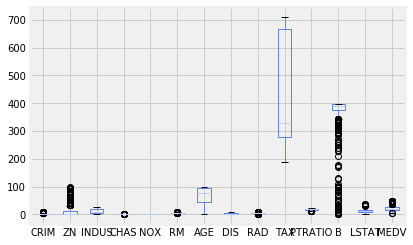

In [68]:
# Not useful due to the different scales used for each column
df.plot.box()

### 8. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [64]:
# I do not see a difference using the formula I am using to adust the range. 

In [69]:
# adjust the range 
df_normalized = (df-df.mean())/df.std()
df_normalized.unstack().sort_values(kind="quicksort")

B     450   -3.903331
      423   -3.879233
      410   -3.878357
RM    365   -3.876413
B     457   -3.868498
               ...   
CHAS  142    3.664771
      277    3.664771
      210    3.664771
      208    3.664771
ZN    57     3.800473
Length: 7084, dtype: float64

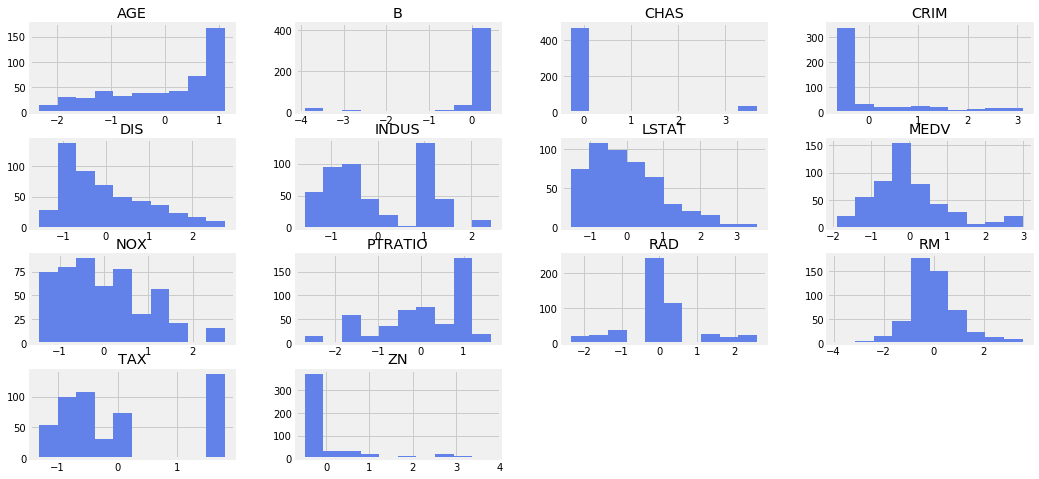

In [62]:
# adjust ranges view
df_normalized.hist(figsize=(16,8));

In [71]:
# adjusted ranges view
df_normalized.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RAD        0.362709
RM         0.403612
TAX        0.669956
NOX        0.729308
DIS        0.834237
LSTAT      0.906460
MEDV       1.108098
CRIM       1.652342
ZN         2.225666
CHAS       3.405904
dtype: float64

In [44]:
df_scaled = df.apply(lambda x: x/x.max(), axis=0)
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000634,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.443461,0.125,0.416315,0.695455,1.000000,0.131156,0.480
1,0.002740,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.538562,0.250,0.340366,0.809091,1.000000,0.240716,0.432
2,0.002738,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.538562,0.250,0.340366,0.809091,0.989746,0.106136,0.694
3,0.003248,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.657299,0.375,0.312236,0.850000,0.994281,0.077430,0.668
4,0.006928,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.657299,0.375,0.312236,0.850000,1.000000,0.140374,0.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.006284,0.00,0.430065,0.0,0.657865,0.750911,0.691,0.268744,0.125,0.383966,0.954545,0.987629,0.254675,0.448
502,0.004542,0.00,0.430065,0.0,0.657865,0.697039,0.767,0.248024,0.125,0.383966,0.954545,1.000000,0.239136,0.412
503,0.006096,0.00,0.430065,0.0,0.657865,0.794533,0.910,0.235013,0.125,0.383966,0.954545,1.000000,0.148538,0.478
504,0.010996,0.00,0.430065,0.0,0.657865,0.773804,0.893,0.259018,0.125,0.383966,0.954545,0.991308,0.170661,0.440


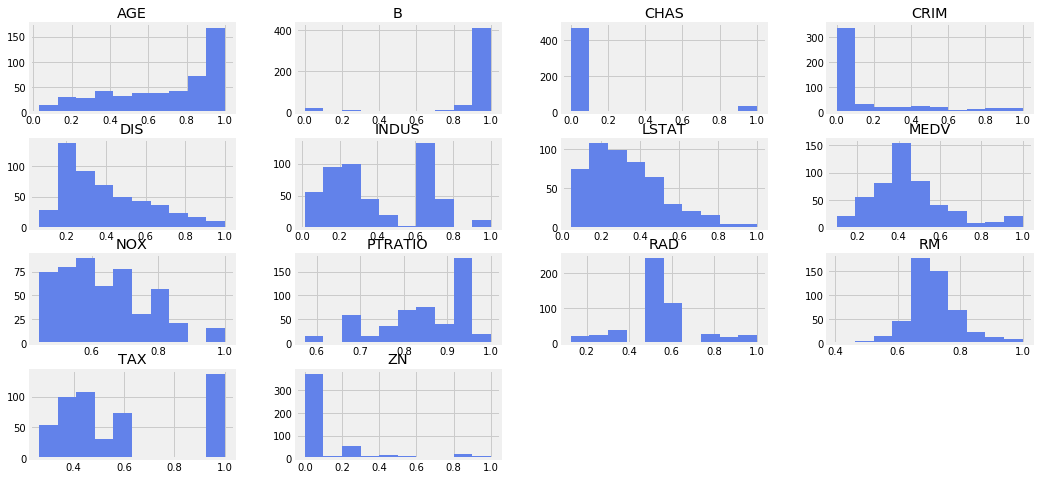

In [46]:
df_scaled.hist(figsize=(16,8));

In [48]:
df_scaled.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RAD        0.362709
RM         0.403612
TAX        0.669956
NOX        0.729308
DIS        0.834237
LSTAT      0.906460
MEDV       1.108098
CRIM       1.652342
ZN         2.225666
CHAS       3.405904
dtype: float64

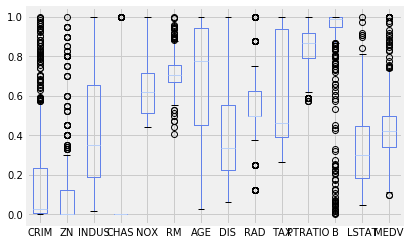

In [96]:
df_scaled.plot.box()

### 9. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

In [90]:
df_4 = df[['MEDV','CHAS','TAX', 'RAD']]
df_4.head(1)

,MEDV,CHAS,TAX,RAD
0,24.0,0,296.0,1


In [91]:
df_4.describe()

,MEDV,CHAS,TAX,RAD
count,506.000000,506.000000,506.000000,506.000000
mean,22.532806,0.069170,408.237154,4.332016
std,9.197104,0.253994,168.537116,1.417166
min,5.000000,0.000000,187.000000,1.000000
25%,17.025000,0.000000,279.000000,4.000000
50%,21.200000,0.000000,330.000000,4.000000
75%,25.000000,0.000000,666.000000,5.000000
max,50.000000,1.000000,711.000000,8.000000


In [94]:
df_4.mode()

,MEDV,CHAS,TAX,RAD
0,50.0,0,666.0,4


In [97]:
# It looks like Median value was artificially capped at $50K as the mode is %50K


### 10. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

In [65]:
# 3 Descriptive
# 4 Descriptive
# 5 Inferential
# 6 Descriptive
# 7 Descriptive
# 8 Descriptive
# 9 Descriptive

### 11. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**11.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [100]:
df.sample(30)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
112,0.12329,0.0,10.01,0,0.5470,5.913,92.9,2.3534,6,432.0,17.8,394.95,16.21,18.8
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9
189,0.08370,45.0,3.44,0,0.4370,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39,34.9
276,0.10469,40.0,6.41,1,0.4470,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05,33.2
102,0.22876,0.0,8.56,0,0.5200,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
165,2.92400,0.0,19.58,0,0.6050,6.101,93.0,2.2834,5,403.0,14.7,240.16,9.81,25.0
69,0.12816,12.5,6.07,0,0.4090,5.885,33.0,6.4980,4,345.0,18.9,396.90,8.79,20.9
357,3.84970,0.0,18.10,1,0.7700,6.395,91.0,2.5052,4,666.0,20.2,391.34,13.27,21.7
129,0.88125,0.0,21.89,0,0.6240,5.637,94.7,1.9799,4,437.0,21.2,396.90,18.34,14.3
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307.0,17.4,378.95,3.95,48.3


**11.B Identify the type of sampling we just used.**

In [12]:
# Random sampling from the whole population 
# Where a subset of a statistical population in which each member of the subset has an equal probability of being chosen

### 12. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


In [101]:
# There are five types of sampling: Random, Systematic, Convenience, Cluster, and Stratified.

In [104]:
# Example of systematic - Every 5th row selected. 
df.iloc[::5, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307.0,21.0,376.57,21.02,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,4,666.0,20.2,388.62,10.58,21.2
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,23.1
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
